In [39]:
cd(@__DIR__)
using Pkg
Pkg.activate("./")

  Activating environment at `~/ManningLiveProjects/julia/kmeans-dbscan-clustering/k-means-clustering/Project.toml`


In [40]:
import Downloads
import SHA
using Arrow
using Chain
using DataFrames, Random, DelimitedFiles, CSV
using Plots
using FreqTables
using Statistics
using StatsBase
using SHA
using Clustering


In [41]:
# load data from arrow file
df = DataFrame(Arrow.Table("sales_norm.arrow"))

,P1,P2,P3,P4,P5,P6,P7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.369588,1.27724,-0.579404,1.04645,-0.142511,-0.498219,-0.0405672
2,0.640272,0.854207,0.790096,-0.075517,-1.06883,-0.498219,1.64703
3,0.0989037,-0.414901,-0.237029,1.32694,1.40135,-0.903022,-0.462466
4,-0.442464,-0.837937,0.105346,-0.916993,0.783809,1.12099,1.22513
5,0.910956,1.27724,0.447721,0.204975,-0.760057,0.71619,1.64703
6,0.640272,-1.26097,-0.237029,-0.636501,-0.451284,-0.498219,1.22513
7,1.18164,0.854207,-0.579404,0.204975,0.166262,1.5258,-0.884365
8,3.07643,-0.414901,1.47485,1.32694,1.71013,0.71619,-0.462466
9,-0.983832,-0.414901,1.13247,1.32694,0.166262,0.71619,2.49083


In [42]:
# get matrix from df
mat = Matrix(df)

52×811 Matrix{Float64}:
  0.369588    1.27724     -0.579404  …   0.571772  -0.594121  -0.438798
  0.640272    0.854207     0.790096     -0.571772  -0.594121   0.987295
  0.0989037  -0.414901    -0.237029     -0.571772  -0.594121  -0.438798
 -0.442464   -0.837937     0.105346     -0.571772   1.22319   -0.438798
  0.910956    1.27724      0.447721      0.571772  -0.594121  -0.438798
  0.640272   -1.26097     -0.237029  …   0.571772  -0.594121  -0.438798
  1.18164     0.854207    -0.579404      1.71532   -0.594121  -0.438798
  3.07643    -0.414901     1.47485       0.571772  -0.594121  -0.438798
 -0.983832   -0.414901     1.13247       0.571772   1.22319   -0.438798
  1.18164    -0.414901    -0.921779     -0.571772  -0.594121  -0.438798
  0.369588   -0.837937     1.81722   …  -0.571772  -0.594121  -0.438798
  1.18164    -0.837937     0.105346      0.571772  -0.594121  -0.438798
  1.72301     0.854207    -1.60653      -0.571772  -0.594121  -0.438798
  ⋮                                  ⋱  

Load data into dataframe

In [43]:
# mean extremes
extrema(mean(mat, dims=1))

(-4.526293869625638e-16, 5.252208924188241e-16)

Mean is close to 0

In [44]:
# std extremes
extrema(std(mat, dims=1))

(0.9999999999999998, 1.0000000000000002)

std is close to 1

Show bar plots

Produce clustering results for k (number of clusters) values between 2 and 20 with k-means++ centroid initialization. Store the results for all values of k in one vector.

In [45]:
# using Pkg
# Pkg.add("Clustering")

In [46]:
#using Clustering
R_pp=[kmeans(mat, i) for i in 2:20]


19-element Vector{KmeansResult{Matrix{Float64}, Float64, Int64}}:
 KmeansResult{Matrix{Float64}, Float64, Int64}([-0.22366189901995773 0.11221887582964551; -0.24914053130396815 0.24478079858664747; … ; 0.6393490717236381 -0.29104932698621894; 1.1803179705074929 -0.4950893641768761], [2, 2, 2, 2, 2, 1, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 2, 1, 1, 1, 1], [47.66725789931839, 55.863908436421106, 53.28326519741609, 51.53769289476298, 43.3747738779163, 47.465517318963094, 44.70290468119363, 53.45318165087442, 40.346343024427995, 41.58239991030473  …  60.269331723527415, 45.79910067071977, 48.999812625978265, 44.29212955888822, 40.15695382827329, 53.71498231155887, 42.47085675347091, 42.29022920435136, 48.13192175783114, 55.05240074164009], [477, 334], [477, 334], 37017.39222664043, 9, true)
 KmeansResult{Matrix{Float64}, Float64, Int64}([-0.30832921741132147 -0.09524396893557413 0.16972708139100912; -0.18761545574584682 -0.2287107499655674 0.26745456890102814; … ; 0.5248314647468455 0.626340085178

In [47]:
#random centroid init
R_rand=[kmeans(mat, i; init=:rand) for i in 2:20]

19-element Vector{KmeansResult{Matrix{Float64}, Float64, Int64}}:
 KmeansResult{Matrix{Float64}, Float64, Int64}([-0.22440763726294305 0.11328389721259156; -0.24750927126353864 0.24245112481633335; … ; 0.6413035941634352 -0.2938406659197018; 1.1853102862154206 -0.5022191084663413], [2, 2, 2, 2, 2, 1, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 2, 1, 1, 1, 1], [47.63569831818456, 55.8535724054627, 53.22931595511061, 51.500558450097884, 43.309079105193746, 47.385142141273256, 44.65641591960459, 53.47942387202172, 40.475809392397224, 41.63375526247852  …  60.32730314640139, 45.80724132821816, 48.98371186408798, 44.201549220675645, 40.104994122333714, 53.64229348176362, 42.54080038205248, 42.29798354409219, 48.12355253023354, 55.03515402753419], [477, 334], [477, 334], 37017.50689898469, 14, true)
 KmeansResult{Matrix{Float64}, Float64, Int64}([-0.019410402074389377 -0.32798950606667815 0.1351675256730047; -0.05253784175971078 -0.2456918485916497 0.19476179929492338; … ; 0.5532323535251471 0.57283060406

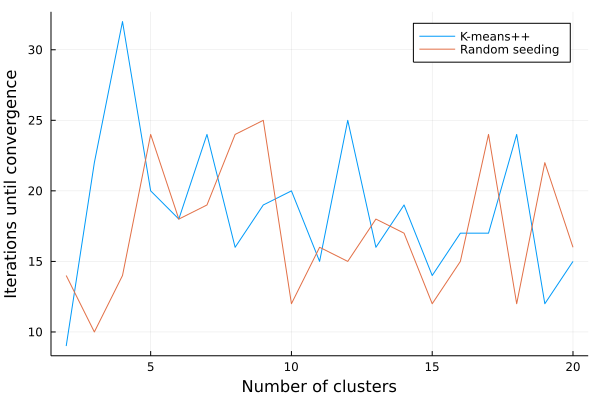

In [48]:
# Check how many iterations both seeding algorithm required before converging for all 'k' values
plot(2:20, hcat(getfield.(R_pp, :iterations), getfield.(R_rand,:iterations)),
    xlab="Number of clusters", ylab="Iterations until convergence", label=["K-means++" "Random seeding"])

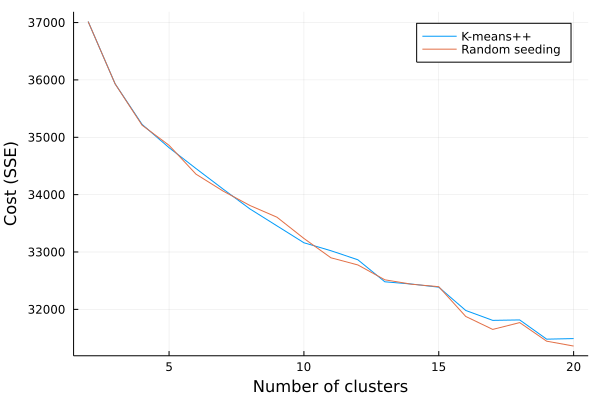

In [49]:
# SSE and elbow method
plot(2:20, hcat(getfield.(R_pp, :totalcost), getfield.(R_rand,:totalcost)), 
    xlab = "Number of clusters", ylab = "Cost (SSE)", label = ["K-means++" "Random seeding"])

In [50]:
# Compare assignments between the 2 methods
freqtable(R_pp[3].assignments, R_rand[3].assignments, )

4×4 Named Matrix{Int64}
Dim1 ╲ Dim2 │   1    2    3    4
────────────┼───────────────────
1           │ 187    8    7    7
2           │  27  145    1    0
3           │   6   10  187    0
4           │   5    0   12  209

Above shows unbalanced clusters

In [51]:
#set seeding
Random.seed!(100)
# run 1000 iterations for 4 clusters
R4_pp=[kmeans(mat, 4) for _ in 1:1000]

1000-element Vector{KmeansResult{Matrix{Float64}, Float64, Int64}}:
 KmeansResult{Matrix{Float64}, Float64, Int64}([0.15756444854320534 -0.1805579445400193 -0.02044949750920572 -0.35860583055673984; 0.23736976782166863 -0.09621859280458657 -0.0574985650252412 -0.340967650660056; … ; -0.49992489183843236 0.4130377922695772 0.583782923421601 0.6297488859174263; -0.8653070479118147 -0.006754954315517836 0.9276714833131035 2.5065095969113655], [1, 2, 2, 2, 1, 3, 1, 3, 3, 3  …  2, 4, 4, 3, 4, 2, 4, 4, 2, 2], [47.28818570847089, 55.33050437548718, 51.44136829990119, 50.43261946145885, 45.26463556960522, 46.013846037264145, 44.91427650690005, 52.92726111669516, 39.534791400467086, 42.86009421113819  …  54.9117953829633, 46.53279930740763, 47.36562487863497, 40.750053295002594, 40.64970610350054, 53.8430356007172, 40.23986005543614, 40.1602305338297, 47.807563946125946, 51.384387748897566], [215, 234, 204, 158], [215, 234, 204, 158], 35211.98510448584, 27, true)
 KmeansResult{Matrix{Float64}, 

In [52]:
# random seeding
R4_rand=[kmeans(mat, 4, init=:rand) for _ in 1:1000]

1000-element Vector{KmeansResult{Matrix{Float64}, Float64, Int64}}:
 KmeansResult{Matrix{Float64}, Float64, Int64}([-0.3560912630740747 0.18012794486678665 -0.1508186778329433 -0.06213198269996466; -0.3405008011114336 0.25456344357319016 0.018337858597580425 -0.1743063700006671; … ; 0.8691161172178464 -0.3949448008959267 -0.013941989312765867 0.6974999720671652; 1.9047295210132313 -0.8110286687615663 0.057948038657439034 1.0695857603857046], [2, 3, 3, 3, 2, 4, 2, 3, 4, 2  …  1, 1, 1, 4, 1, 2, 1, 1, 1, 3], [47.537968378955384, 55.39083413437795, 48.41800530178422, 46.43246670441595, 44.988501318398434, 46.359256464510906, 44.39111301098464, 54.45732090897366, 41.11326350211303, 42.25119683648414  …  54.82235824387849, 45.86816495425367, 48.37423862276072, 42.03054013646776, 41.24645009441885, 54.72872028574454, 37.57292928970011, 38.8125779574933, 50.74901071465382, 47.88370270271044], [193, 229, 198, 191], [193, 229, 198, 191], 35249.77101333152, 46, true)
 KmeansResult{Matrix{Float64}

In [53]:
# Coefficient of variation
# shows the extent of variability in relation to the mean of the population
R4_tc = getfield.(R4_pp, :totalcost);
R4_tc_rand = getfield.(R4_rand, :totalcost);

println("Coefficient of variation k++: ", std(R4_tc)/mean(R4_tc)*100, "%")
println("Coefficient of variation rand: ", std(R4_tc_rand)/mean(R4_tc_rand)*100, "%")

Coefficient of variation k++: 0.22996344254540974%
Coefficient of variation rand: 0.24092232054300014%


In [54]:
# Pick the best clustering based on conducted evaluations
opt_clustering = if minimum(R4_tc) <= minimum(R4_tc_rand)
    R4_pp[argmin(R4_tc)]
else
    R4_rand[argmin(R4_tc_rand)]
end;

In [55]:
# Check the members count in each cluster
# The clusters look quite balanced
freqtable(opt_clustering.assignments)

4-element Named Vector{Int64}
Dim1  │ 
──────┼────
1     │ 167
2     │ 227
3     │ 213
4     │ 204

Custers better balanced across 4

Checking mean of clusters

In [56]:
mat[:, opt_clustering.assignments .== 1]

52×167 Matrix{Float64}:
  0.965096   0.171411  -0.457523  …  -0.382659   -1.35798    0.571772
 -1.27781   -0.233743   1.44577      -1.06881    -0.860692  -0.571772
  0.965096   0.981719   0.176909     -1.06881    -1.35798   -0.571772
  0.684733  -0.233743   1.44577       0.303488   -1.35798   -0.571772
  1.52582   -0.233743   0.494125     -1.75495    -0.860692   0.571772
 -1.27781    0.171411   1.12856   …  -0.382659   -0.363403   0.571772
 -0.436719  -0.233743   0.811341      0.646561   -0.363403   1.71532
  1.24546   -0.233743  -0.774739      0.989634    1.62575    0.571772
 -0.156356  -1.04405    0.811341     -0.725732   -1.35798    0.571772
 -0.997445   0.576565   0.811341     -1.06881    -0.860692  -0.571772
 -0.997445  -0.638896   0.494125  …   0.303488   -1.35798   -0.571772
 -0.436719  -1.04405    2.08021       1.33271    -0.363403   0.571772
 -0.436719  -0.638896  -0.457523     -0.0395854  -0.363403  -0.571772
  ⋮                               ⋱               ⋮         
 -1.55

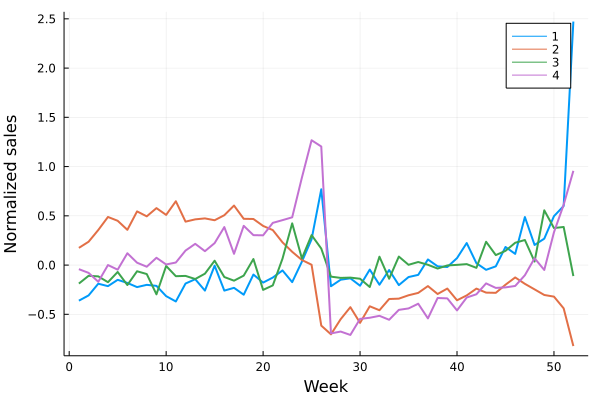

In [57]:
# Plot cluster averages
# Each cluster has some distinct characteristic we should summarize for the recipients of the report
plot(hcat([mean(mat[:, opt_clustering.assignments .== i], dims=2) for i in 1:4]...), 
    xlab="Week", ylab="Normalized sales", labels=[1 2 3 4], linewidth=2)

The time series plots follow similar trends over time, and they all peak or dip around similar weeks

Do similar plot for standard deviation

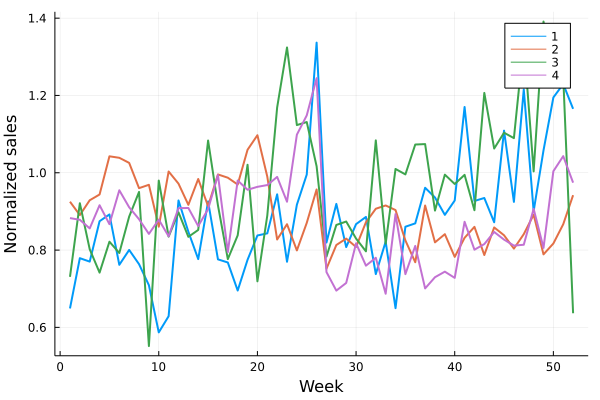

In [59]:
plot(hcat([std(mat[:, opt_clustering.assignments .== i], dims=2) for i in 1:4]...), 
    xlab="Week", ylab="Normalized sales", labels=[1 2 3 4], linewidth=2)

Clusters do have different variations over time

In [60]:
# Save clean dataset as Arrow file
# Save k-means assignments to the text file
open("kmeans_assignments.txt", "w") do io
    foreach(e -> println(io, e), opt_clustering.assignments)
  end

>Analysis from solution

**Analysis of clustering results**

Based on clustering results evaluation we produced 4 clusters for all products in the dataset.

Each cluster has distinct characteristic summarized below:
* Cluster 1 sales were increasing steadily until mid-year when they dropped to extremely low values. After that we again see a steady increase in sales. We should investigate what exactly happend around the spike period - maybe there was a new hot release (initial increase in sales), but it was faulty and our customers resigned from the product?
* Cluster 2 is similar to Cluster 3 as it has a positive trend for sales and absolute sales values are on similar level. However there is a rapid raise mid-year that is followed by also sudden drop in sales to the previous level. Also there is huge sales boost at the end of tracked period. That group of products are really popular recently for some reason.
* Cluster 3 is the most stable, there is no spike in the sales and it expose slight increasing trend
* Cluster 4 maintained high, steady sales for 20 weeks, which was followed by sharp drop in revenue. Sales were recovering after the drop, but we can spot another decrease during last weeks. Maybe our other products are consuming sales for that cluster?

Variance analysis revealed that there is no signifanct difference in clusters' sales stability. Cluster 2 and 3 are however switiching from really small variance at the beginning of the year to high variance mid-year and at the end of the period. 